<a href="https://www.kaggle.com/code/suyashkapil/simple-model-for-height-change-prediction?scriptVersionId=117303158" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [14]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
h1 = pd.read_csv('../input/human-height/annual-change-in-average-female-height.csv')
#Reads the csv file containing info about annual change in average female height country-wise

In [3]:
h1.head(1000)
#shows the first 1000 rows of the dataset. There are 4 columns.

,Entity,Code,Year,Year-on-year change in female height (%)
0,Afghanistan,AFG,1897,0.08962
1,Afghanistan,AFG,1898,0.08977
2,Afghanistan,AFG,1899,0.08966
3,Afghanistan,AFG,1900,0.08963
4,Afghanistan,AFG,1901,0.08949
...,...,...,...,...
995,Australia,AUS,1992,0.03137
996,Australia,AUS,1993,0.03153
997,Australia,AUS,1994,0.03120
998,Australia,AUS,1995,0.03113


In [18]:
h1.groupby('Code').count()['Entity']

Code
AFG    100
AGO    100
ALB    100
AND    100
ARE    100
      ... 
WSM    100
YEM    100
ZAF    100
ZMB    100
ZWE    100
Name: Entity, Length: 201, dtype: int64

100 entries for each country

         Entity Code  Year  Year-on-year change in female height (%)
0   Afghanistan  AFG  1897                                   0.08962
1   Afghanistan  AFG  1898                                   0.08977
2   Afghanistan  AFG  1899                                   0.08966
3   Afghanistan  AFG  1900                                   0.08963
4   Afghanistan  AFG  1901                                   0.08949
..          ...  ...   ...                                       ...
95  Afghanistan  AFG  1992                                  -0.03395
96  Afghanistan  AFG  1993                                  -0.03374
97  Afghanistan  AFG  1994                                  -0.03408
98  Afghanistan  AFG  1995                                  -0.03403
99  Afghanistan  AFG  1996                                  -0.03392

[100 rows x 4 columns]


<BarContainer object of 100 artists>

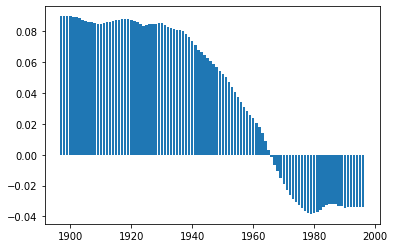

In [25]:
afg = h1[h1['Entity']=='Afghanistan']
print(afg)
plt.bar(afg['Year'],afg['Year-on-year change in female height (%)'])

Height change trend of females in Afghanistan

In [4]:
h1.info()
#700 entries in 'Code' column are null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    20800 non-null  object 
 1   Code                                      20100 non-null  object 
 2   Year                                      20800 non-null  int64  
 3   Year-on-year change in female height (%)  20800 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 650.1+ KB


In [5]:
h2 = h1.drop(columns = ['Code']) #removed the 'code' column as the 'Entity' column contains the same info for the model
h3 = pd.factorize(h2.Entity)[0] #assigned numbers to the strings containing the name of the country 
h2['Entity'] = h3 #New 'Entity' column of the dataset is h3
h2

,Entity,Year,Year-on-year change in female height (%)
0,0,1897,0.08962
1,0,1898,0.08977
2,0,1899,0.08966
3,0,1900,0.08963
4,0,1901,0.08949
...,...,...,...
20795,207,1992,-0.05757
20796,207,1993,-0.05781
20797,207,1994,-0.05820
20798,207,1995,-0.05824


In [6]:
h2.info() #data is ready for model to b applied

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    20800 non-null  int64  
 1   Year                                      20800 non-null  int64  
 2   Year-on-year change in female height (%)  20800 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 487.6 KB


In [7]:
x = h2.iloc[:,0:2] #slicing to assign x_train and y_train
y = h2.iloc[:,2]
print(x)
print(y)

       Entity  Year
0           0  1897
1           0  1898
2           0  1899
3           0  1900
4           0  1901
...       ...   ...
20795     207  1992
20796     207  1993
20797     207  1994
20798     207  1995
20799     207  1996

[20800 rows x 2 columns]
0        0.08962
1        0.08977
2        0.08966
3        0.08963
4        0.08949
          ...   
20795   -0.05757
20796   -0.05781
20797   -0.05820
20798   -0.05824
20799   -0.05849
Name: Year-on-year change in female height (%), Length: 20800, dtype: float64


In [8]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)
#The dataset is now split into train and test dataset 

In [9]:
print(x_test)  #printing all the datasets fit into the model and to be tested
print(y_train)
print(x_train)
x_test.info()

       Entity  Year
15920     159  1917
2420       24  1917
3589       35  1986
2490       24  1987
13482     134  1979
...       ...   ...
18172     181  1969
8112       81  1909
852         8  1949
9631       96  1928
2500       25  1897

[4160 rows x 2 columns]
11800    0.10116
5437     0.10406
18566   -0.00220
1062     0.06559
13816    0.08394
          ...   
1099    -0.02216
18898   -0.04121
11798    0.07353
6637     0.06013
2575     0.04573
Name: Year-on-year change in female height (%), Length: 16640, dtype: float64
       Entity  Year
11800     118  1897
5437       54  1934
18566     185  1963
1062       10  1959
13816     138  1913
...       ...   ...
1099       10  1996
18898     188  1995
11798     117  1995
6637       66  1934
2575       25  1972

[16640 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4160 entries, 15920 to 2500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Entity  4160 non-nu

In [10]:
rfc = RandomForestRegressor() #Random Forest regressor is the algorithm used here
model = rfc.fit(x,y) #fitting the dataset into the model
pred = model.predict(x_test) #predictions dataset
#It is not a classification problem but rather a regression problem so random forest regressor is used here
#any other regression model can be used

In [11]:
h4 = pd.DataFrame()
h4['Predictions'] = pred
h4
#converting the results into a dataframe with an index

,Predictions
0,0.064016
1,0.069258
2,-0.077530
3,-0.035992
4,0.028982
...,...
4155,0.069121
4156,0.119003
4157,0.067257
4158,0.062650


In [12]:
from sklearn.metrics import r2_score #importing library to measure accuracy

In [13]:
print(r2_score(y_test,pred)*100) #the r2_score is almost 100 which is quite good

99.88364508587472
